<a href="https://colab.research.google.com/github/nasyawa/PCVK_GANJIL_2023/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODUL 9 –
Morfologi (Erosi, Dilasi, Opening, Closing,
Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)

import folder yang ada di Drive Anda

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import beberapa library

In [102]:
import cv2
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [77]:
def dilasi_citra(F, w):
  p,q = F.shape
  imgD = np.zeros((p,q), dtype=np.uint8)
  SED = np.ones((w,w),dtype=np.uint8)
  constant1 = (w-1)//2

  for i in range(constant1, p-constant1):
    for j in range(constant1, q-constant1):
      temp = F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product = temp*SED
      imgD[i,j] = np.max(product)

  return imgD

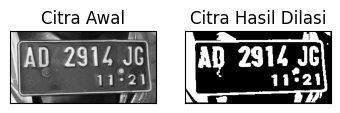

In [78]:
#img_d = cv2.imread('/content/drive/MyDrive/PCVK/plat.jpeg', 0)
img_d = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w = 3
imgD = dilasi_citra(thresh, w)

plt.subplot(131),plt.imshow(img_d, cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,

In [79]:
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg')
ret, thresh = cv2.threshold(img, 156, 200, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint16)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
print(kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


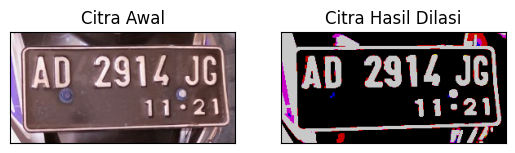

In [80]:
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilasi),plt.title('Citra Hasil Dilasi')
plt.xticks([]), plt.yticks([])
plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV,

In [81]:
def erosi_citra(F,k):
  m, n = F.shape

  SE = np.ones((k,k), dtype=np.uint8)
  constant = (k-1)//2

  imgE = np.zeros((m,n), dtype=np.uint8)

  for i in range(constant, m-constant):
    for j in range(constant, n-constant):
      temp = F[i-constant:i+constant+1, j-constant:j+constant+1]
      product = temp*SE
      imgE[i,j] = np.min(product)

  return imgE

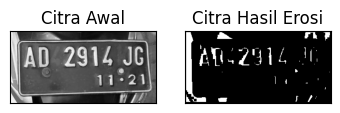

In [82]:
img_e= cv2.imread ('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret1, thresh1 = cv2.threshold(img_e, 100, 255, cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV

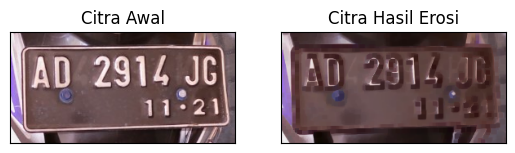

In [83]:
#EROSI LIBRARY
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg')
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(erosion),plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()


 7. Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
 **Operasi Opening Menggunakan tanpa Library Morphology**

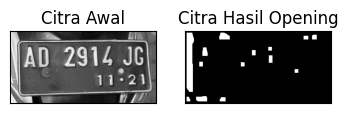

In [84]:
#Tanpa Library Morphology
img_o = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 255,cv2.THRESH_BINARY)
k = 7
imgO = dilasi_citra(erosi_citra(thresho,k),k)

plt.subplot(131),plt.imshow(img_o,cmap= 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

**Operasi Opening Menggunakan Library Morpholog**

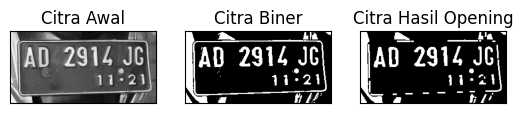

In [85]:
#Dengan Menggunakan Library
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
openn = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(openn,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]),
plt.yticks([])
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

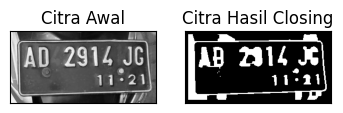

In [86]:
img_c= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0) #
retc, threshc = cv2.threshold(img_c, 127, 225,
cv2.THRESH_BINARY)
k=7
imgC = erosi_citra(dilasi_citra(threshc,k),k)
plt.subplot(131),plt.imshow(img_c,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgC,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]),
plt.yticks([])
plt.show()



- operasi closing dengan library morphology

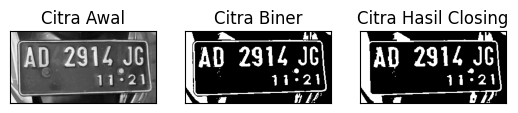

In [87]:
img = cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

SED = Cross 3


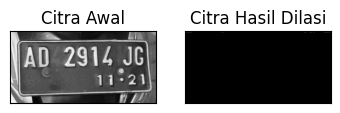

SED = Cross 5


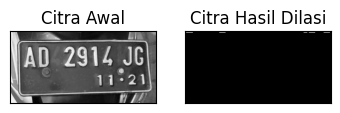

In [88]:
#Dilasi Cross SED
def dilasi_citra(F,w):
 #size image
 p,q= F.shape

 imgD= np.zeros((p,q), dtype=np.uint8)
 #Generate structure element dilasi (SED)
 # SED= np.ones((w,w), dtype=np.uint8)
 SED = np.array([[0, 1, 0],
                 [1, 1, 1],
                 [0, 1, 0]], dtype = np.uint8)
 constant1= (w-1)//2

 #Proses Dilasi
 for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*SED
    imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
#Generate structure element dilasi (SED)
# SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
    return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()


10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5,

SED = Circle 3


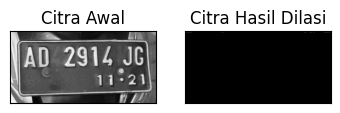

SED = Circle 5


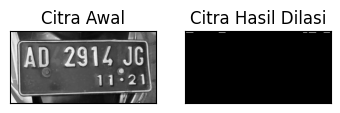

In [89]:
#Dilasi Circular SED
def dilasi_citra(F,w):
    #size image
    p,q= F.shape
    imgD= np.zeros((p,q), dtype=np.uint8)

    #Generate structure element dilasi (SED)
    SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
    constant1= (w-1)//2

    #Proses Dilasi
    for i in range(constant1, p-constant1):
      for j in range(constant1,q-constant1):
        temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
        product= temp*SED
        imgD[i,j]= np.max(product)
      return imgD
print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/plat2.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()



11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7,

# TUGAS

- KTP - Dhorifitto

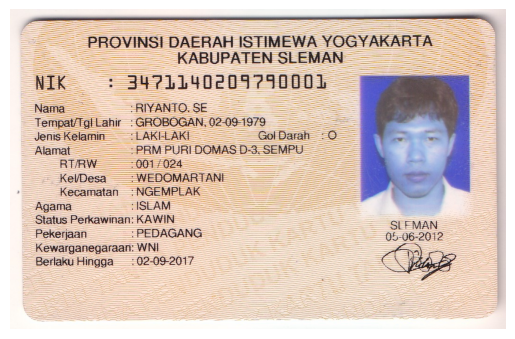

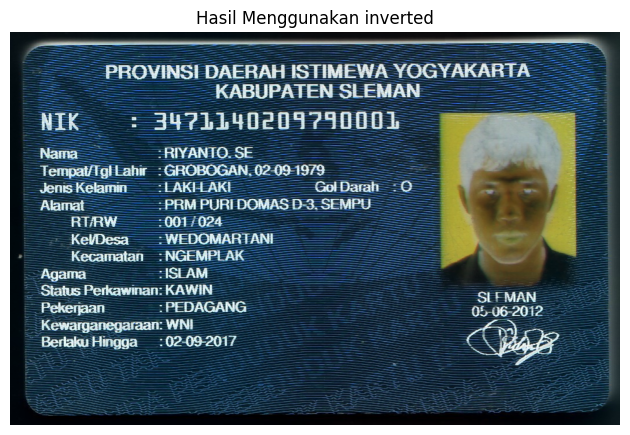

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

kernel = np.ones((1, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

inverted_erosion = cv2.bitwise_not(erosion)

plt.imshow(inverted_erosion, cmap='gray')
plt.axis('off')
plt.title('Hasil Menggunakan inverted')

plt.tight_layout()
plt.show()

Gray Image


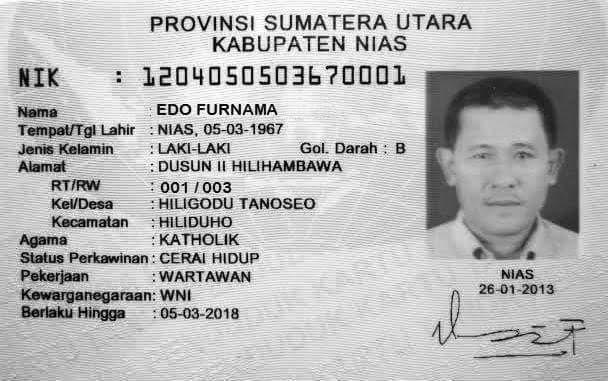

Final Image


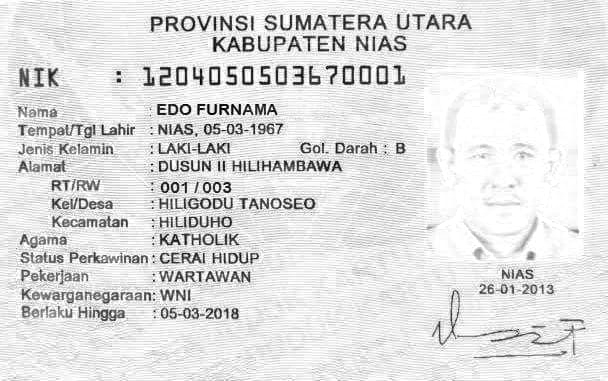

In [91]:
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp5.png', 0)

Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)

inverted_image = cv2.bitwise_not(blackhat)

print('Gray Image')
cv2_imshow(img)

print('Final Image')
cv2_imshow(inverted_image)

- KTP 1 - Josafat

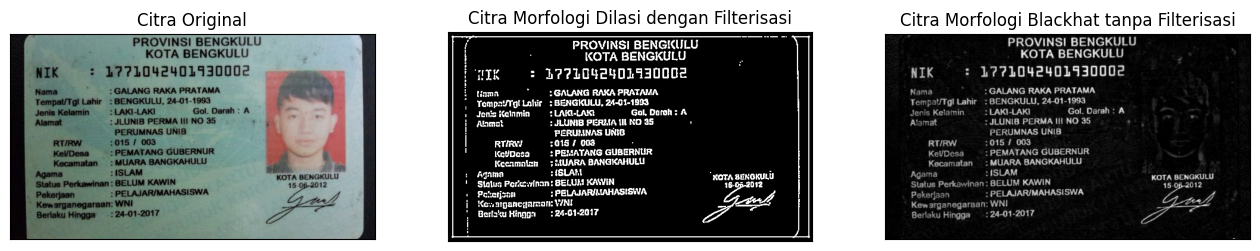

In [92]:
#ktp1.png

import glob
from google.colab.patches import cv2_imshow

# Operasi Aritmatika (Gamma Correction)
ktp_ori = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')
gamma_image = np.zeros(ktp_ori.shape, ktp_ori.dtype)
for y in range(ktp_ori.shape[0]):
  for x in range(ktp_ori.shape[1]):
    for c in range(ktp_ori.shape[2]):
      gamma_image[y,x,c] = np.clip((255 * ((ktp_ori[y,x,c]/255)**(1/1))), 0, 255)

inverse_ktp = ~gamma_image
ktp_gray = cv.cvtColor(inverse_ktp, cv.COLOR_BGR2GRAY)

# Fungsi Convolution2D
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_img = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_img[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_img

# Sharpening
def sharpening_filter(gray_img):
    kernel_sharpening_filter = np.array([[0, -1, 0],
                                        [-1, 5, -1],
                                        [0, -1, 0]])
    sharp_filter_image = convolution2d(gray_img, kernel_sharpening_filter, 1, 2)
    return sharp_filter_image

sharp_filter_image = sharpening_filter(ktp_gray)

# Low Pass Filter (Mengurangi Noise dan Menghaluskan hasil Sharpening)
def low_pass_filter(gray_img):
    kernel_low_pass_filter = np.array([[1, 1, 1],
                                      [1, 4, 1],
                                      [1, 1, 1]])/12
    low_pass_image = convolution2d(gray_img, kernel_low_pass_filter, 1, 2)
    return low_pass_image

low_filter_image = low_pass_filter(sharp_filter_image)

# Blur
import math

kernel_size = 2
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

blur_image = convolution2d(low_filter_image, gauss_kernel, 1, 2)

# Canny Edge Detection
canny_edge_detection = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
canny_image = convolution2d(blur_image, canny_edge_detection, 1, 2)

# Blur
kernel_size = 1
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

final_image_filter = convolution2d(canny_image, gauss_kernel, 1, 2)

# Dilasi
ret, thresh = cv2.threshold(final_image_filter, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((2,2),np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations = 1)

# Tanpa Filterisasi dan Operasi Aritmatika

# Blackhat
ktp_gray2 = cv.cvtColor(ktp_ori, cv.COLOR_BGR2GRAY)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(ktp_gray2, cv2.MORPH_BLACKHAT, Kernel)

plt.figure(figsize=(16, 8))
plt.subplot(131), plt.imshow(ktp_ori[...,::-1])
plt.title('Citra Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilasi, cmap='gray')
plt.title('Citra Morfologi Dilasi dengan Filterisasi'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(blackhat, cmap='gray')
plt.title('Citra Morfologi Blackhat tanpa Filterisasi'), plt.xticks([]), plt.yticks([])
plt.show()

- KTP 2 - novita

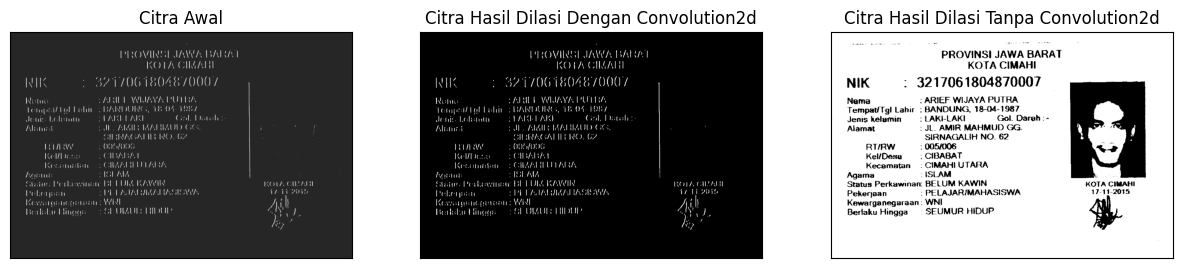

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp2.png')

# Kernel untuk konvolusi
kernel_lsed = np.array([[1, 0, -1],
                      [2, 0, -3],
                      [1, 0, -2]], dtype=np.float32)

# Melakukan konvolusi
result = cv2.filter2D(img, -1, kernel_lsed)


# Penyesuaian kecerahan
brightness = cv2.convertScaleAbs(result, alpha=1, beta=-35)

# Konversi ke citra grayscale
input = cv2.cvtColor(brightness, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, thresh = cv2.threshold(input, 127, 255, cv2.THRESH_BINARY)

# Dilasi
kernel = np.ones((2,1),np.uint16)
dilasi = cv2.dilate(thresh, kernel, iterations=1)

# Citra awal ke grayscale
input2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
ret2, thresh2 = cv2.threshold(input2, 127, 255, cv2.THRESH_BINARY)

# Dilasi
kernel2 = np.ones((2,1),np.uint16)
dilasi2 = cv2.dilate(thresh2, kernel2, iterations=1)

# Menampilkan hasil
plt.figure(figsize=(15,13))
plt.subplot(131),plt.imshow(input, cmap='gray'),plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dilasi, cmap='gray'),plt.title('Citra Hasil Dilasi Dengan Convolution2d')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi2, cmap='gray'),plt.title('Citra Hasil Dilasi Tanpa Convolution2d')
plt.xticks([]), plt.yticks([])
plt.show()

- KTP 5 - Nasyawa

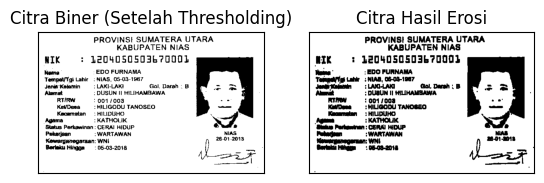

In [107]:
#KTP5
# Baca citra abu-abu
img_gray = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp5.png', cv2.IMREAD_GRAYSCALE)

# Thresholding untuk menghasilkan citra biner
_, img_bin = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

# Buat kernel untuk erosi
kernel = np.ones((3, 2), np.uint8)

# Melakukan erosi pada citra biner
erosion = cv2.erode(img_bin, kernel, iterations=1)

plt.subplot(121), plt.imshow(img_bin, cmap='gray')
plt.title('Citra Biner (Setelah Thresholding)')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()

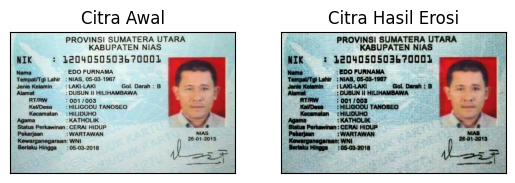

In [94]:
#EROSI LIBRARY
#baca citra KTP 5
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp5.png')
#buat kernel untuk erosi
kernel = np.ones((3,2),np.uint8)
#melakukan erosi pada citra
erosion = cv2.erode(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Awal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Erosi')
plt.xticks([]), plt.yticks([])
plt.show()


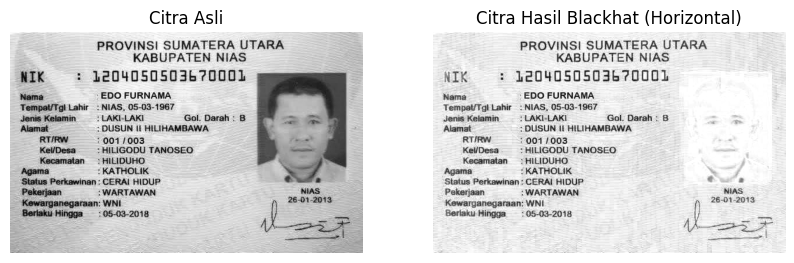

In [115]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp5.png', 0)

# Buat kernel untuk operasi "Blackhat" dengan orientasi horizontal
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 13))  # Mengubah ukuran kernel sesuai orientasi yang diinginkan

# Lakukan operasi "Blackhat" dengan kernel horizontal
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

# Lakukan negasi bitwise pada hasil "Blackhat"
inverted_image = cv2.bitwise_not(blackhat)

# Tampilkan citra asli dan citra hasil "Blackhat" secara horizontal
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray')
plt.title('Citra Hasil Blackhat (Horizontal)')
plt.axis('off')

plt.show()